In [2]:
# %load ../excel/cs_training.py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

path=r'F:\GitHub\python\python-test\excel\cs-training.xlsx'
df=pd.read_excel(path)
print(df)
print(df.info())



   ID  SeriousDlqin2yrs  age  NumberOfOpenCreditLinesAndLoans  \
0   1                 1   20                               15   
1   2                 0   40                                2   
2   3                 0   45                                3   
3   4                 1   21                                4   
4   5                 1   42                               14   

   NumberOfTimes90DaysLate  
0                       20  
1                        1  
2                        2  
3                        3  
4                       19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
ID                                 5 non-null int64
SeriousDlqin2yrs                   5 non-null int64
age                                5 non-null int64
NumberOfOpenCreditLinesAndLoans    5 non-null int64
NumberOfTimes90DaysLate            5 non-null int64
dtypes: int64(5)
memory usage: 280.0 bytes
None


----------------------------------------
    SeriousDlqin2yrs  age  NumberOfOpenCreditLinesAndLoans  \
ID                                                           
1                  1   20                               15   
2                  0   40                                2   
3                  0   45                                3   
4                  1   21                                4   
5                  1   42                               14   

    NumberOfTimes90DaysLate  
ID                           
1                        20  
2                         1  
3                         2  
4                         3  
5                        19  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 4 columns):
SeriousDlqin2yrs                   5 non-null int64
age                                5 non-null int64
NumberOfOpenCreditLinesAndLoans    5 non-null int64
NumberOfTimes90DaysLate            5 non-null int64
dtypes

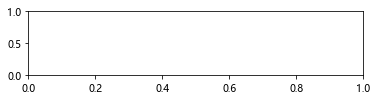

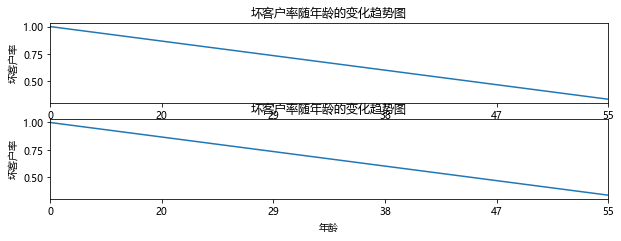

------------------------------------------------------------


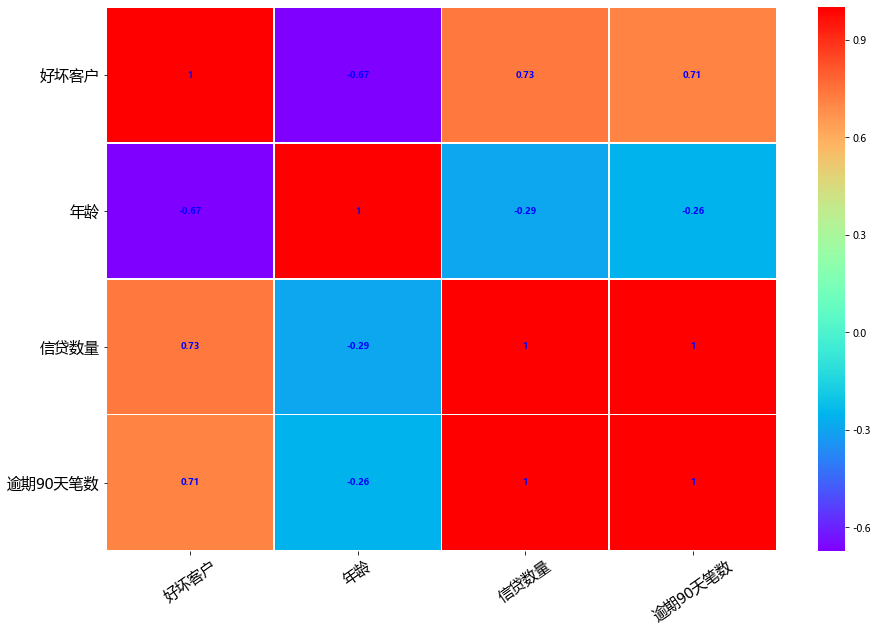

In [3]:
print('----'*10)
df=df.set_index('ID',drop=True)   #设置id列为索引列
print(df)
print(df.info())

print('----'*10)
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
df.rename(columns=states,inplace=True)
print(df)
print(df.info())
print(df[df["好坏客户"]==1])
print(df[df["好坏客户"]==1]["好坏客户"].count())
print(df["好坏客户"].sum())
print(df[df["好坏客户"]==1]["好坏客户"].count()/(df["好坏客户"].count()-df[df["好坏客户"]==1]["好坏客户"].count()))

print('----'*10)
age_cut=pd.cut(df['年龄'],2)
print(age_cut)
age_cut_group=df['好坏客户'].groupby(age_cut).count()
print(type(age_cut_group))
print(age_cut_group)

age_cut_grouped1=df["好坏客户"].groupby(age_cut).sum()
print(age_cut_grouped1)


print('----'*10)
df2=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)
print(df2)
print('----'*10)
df2.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
print(df2)
print('----'*10)
df2.insert(2,"好客户数",df2["总客户数"]-df2["坏客户数"])
print(df2)

print('----'*10)
df2.insert(2,"坏客户占比",df2["坏客户数"]/df2["总客户数"])
print(df2)

print('----'*10)
plt.subplot(3,1,1)
ax1=df2[["好客户数","坏客户数"]].plot.bar(figsize=(10,5))
ax1.set_xticklabels(df2.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")

plt.subplot(3,1,2)
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")


plt.subplot(3,1,3)
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")

plt.show()

print('------'*10)
corr = df.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()